In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [35]:
df = pd.read_csv('PM10_data_with_prep.csv')
df

,stationID,datetime,pm10,o3,co,no2,so2,Traffic congestion index
0,02t,2023-12-01 00:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.4
1,02t,2023-12-01 01:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.1
2,02t,2023-12-01 02:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.5
3,02t,2023-12-01 03:00,65.729167,33.932718,1.1275,62.697183,196.791122,2.3
4,02t,2023-12-01 04:00,65.729167,33.932718,1.1275,62.697183,196.791122,1.8
...,...,...,...,...,...,...,...,...
9511,54t,2024-01-02 20:00,67.000000,33.932718,2.3200,62.697183,196.791122,2.9
9512,54t,2024-01-02 21:00,80.000000,33.932718,2.0400,62.697183,196.791122,3.3
9513,54t,2024-01-02 22:00,91.000000,33.932718,1.6600,62.697183,196.791122,2.5
9514,54t,2024-01-02 23:00,78.000000,33.932718,1.4600,62.697183,196.791122,1.7


### **แยก ตัวแปรอิสระ(x) ตัวแปรตาม(y)**

In [36]:
X = df[['o3', 'co', 'no2', 'so2','Traffic congestion index']]
y = df[['pm10']]

In [37]:
X

,o3,co,no2,so2,Traffic congestion index
0,33.932718,1.1275,62.697183,196.791122,2.4
1,33.932718,1.1275,62.697183,196.791122,2.1
2,33.932718,1.1275,62.697183,196.791122,2.5
3,33.932718,1.1275,62.697183,196.791122,2.3
4,33.932718,1.1275,62.697183,196.791122,1.8
...,...,...,...,...,...
9511,33.932718,2.3200,62.697183,196.791122,2.9
9512,33.932718,2.0400,62.697183,196.791122,3.3
9513,33.932718,1.6600,62.697183,196.791122,2.5
9514,33.932718,1.4600,62.697183,196.791122,1.7


In [38]:
y

,pm10
0,65.729167
1,65.729167
2,65.729167
3,65.729167
4,65.729167
...,...
9511,67.000000
9512,80.000000
9513,91.000000
9514,78.000000


### **Feature Scaling**

In [39]:
scaler = MinMaxScaler()

In [40]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.25343427, 0.38978495, 0.64267899, 0.49225552, 0.22033898],
       [0.25343427, 0.38978495, 0.64267899, 0.49225552, 0.16949153],
       [0.25343427, 0.38978495, 0.64267899, 0.49225552, 0.23728814],
       ...,
       [0.25343427, 0.58064516, 0.64267899, 0.49225552, 0.23728814],
       [0.25343427, 0.50896057, 0.64267899, 0.49225552, 0.10169492],
       [0.25343427, 0.38978495, 0.64267899, 0.49225552, 0.16949153]])

### **แยกชุดข้อมูลออกเป็น(train)และ(test)**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(6661, 5) (2855, 5) (6661, 1) (2855, 5)


In [42]:
y_test

,pm10
8379,65.729167
5955,65.729167
6681,65.729167
2737,65.729167
3529,65.729167
...,...
4078,34.000000
1128,65.729167
4549,41.000000
6885,65.729167


### **Use Model Testing KNeighbors Regression to Prediction**

In [44]:
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [45]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([[65.72916667],
       [66.87083333],
       [65.72916667],
       ...,
       [36.88      ],
       [64.38      ],
       [65.72916667]])

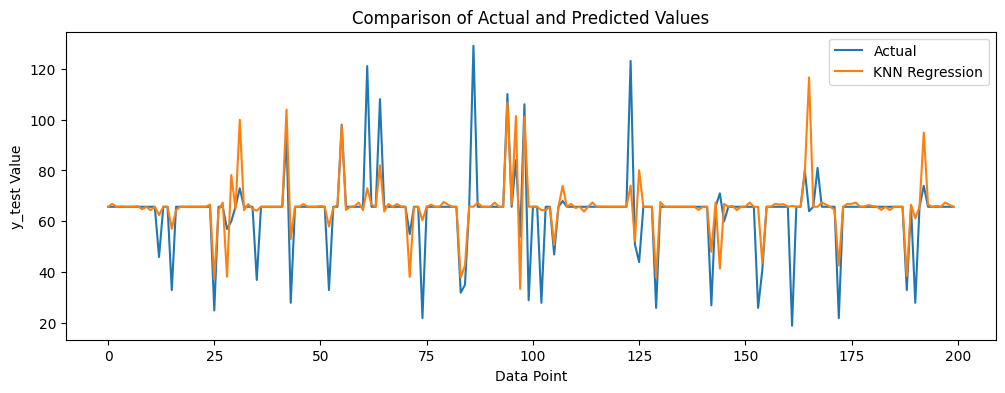

In [46]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from KNN
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Evaluation KNN**

In [47]:
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")

Mean Squared Error: 108.3586590562366
R-squared: 0.4394116282411352


### **Use Model Testing Support Vector Machine to Prediction**

In [49]:
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [50]:
y_svr_pred = svr.predict(X_test)
y_svr_pred

array([65.62930189, 65.63202875, 65.73894802, ..., 68.15485542,
       65.62876942, 65.69627385])

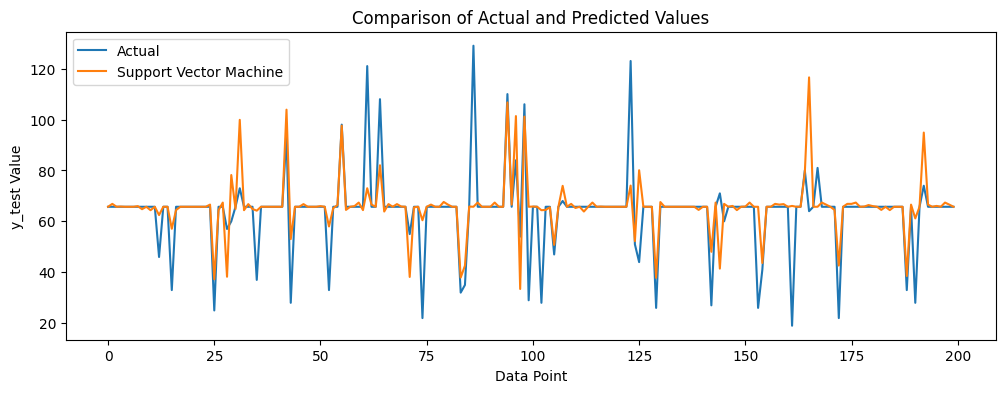

In [51]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from SVR
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='Support Vector Machine')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Evaluation KNN**

In [52]:
svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_r2 = r2_score(y_test, y_svr_pred)

print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")

Mean Squared Error: 155.09636623790996
R-squared: 0.19761632183079003


### **รวมกราฟ**

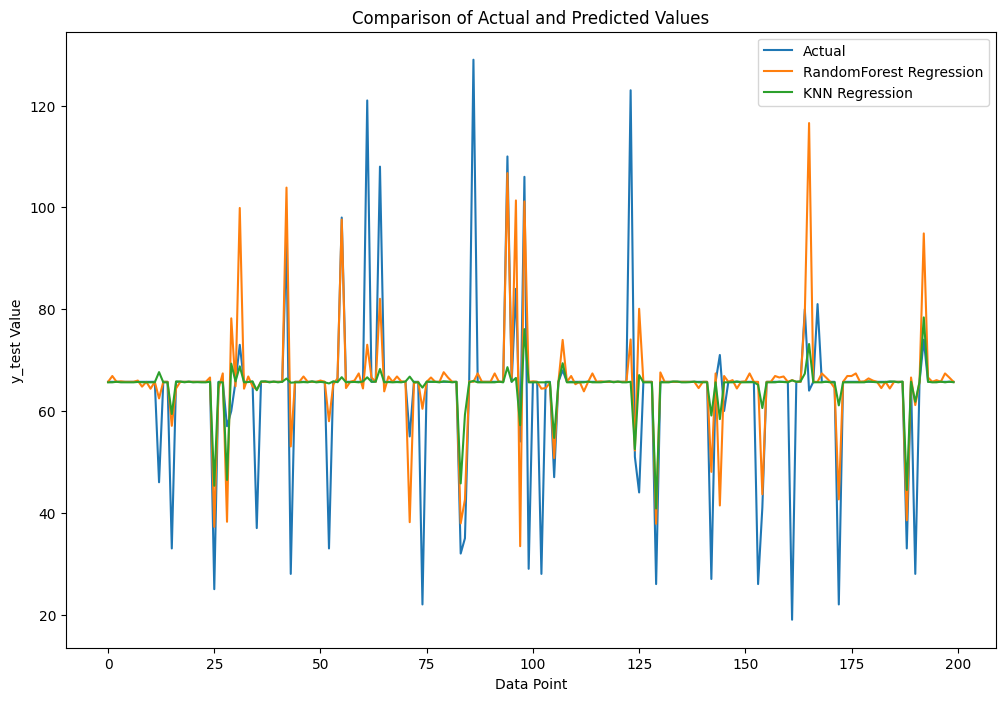

In [55]:
plt.figure(figsize=(12, 8))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from RandomForest Regression
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='RandomForest Regression')

# Plot the predicted values from KNN Regression
sns.lineplot(x=range(200), y=y_svr_pred[:200], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()  # Show legend
plt.show()

### **แสดงข้อมูลและกราฟแท่งและเส้นเพื่อเปรียบเทียบประสิทธิภาพของ K-Nearest Neighbors Regression และ Support Vector Machine**

In [59]:
data = {'model': ['K-Nearest Neighbors Regression', 'Support Vector Machine'],
        'MSE': [knn_mse, svr_mse],
        'R^2': [knn_r2, svr_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MSE,R^2
0,K-Nearest Neighbors Regression,108.358659,0.439412
1,Support Vector Machine,155.096366,0.197616


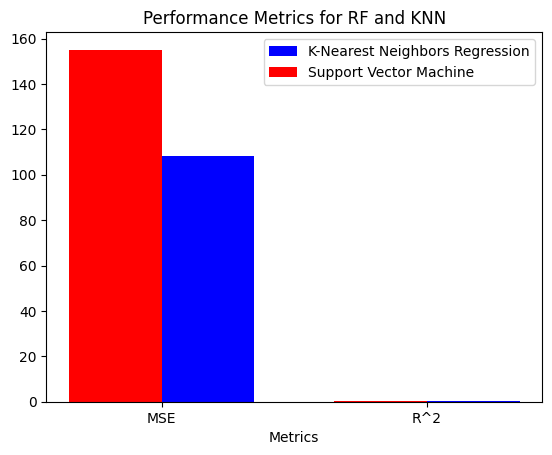

In [57]:
N = 2
ind = np.arange(N)
width = 0.35

kn_metrics = [knn_mse, knn_r2]
svr_metrics = [svr_mse, svr_r2]

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width, kn_metrics, width, label='K-Nearest Neighbors Regression', color='b')
rects2 = ax.bar(ind, svr_metrics, width, label='Support Vector Machine', color='r')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['MSE', 'R^2'])
ax.legend()

plt.show()

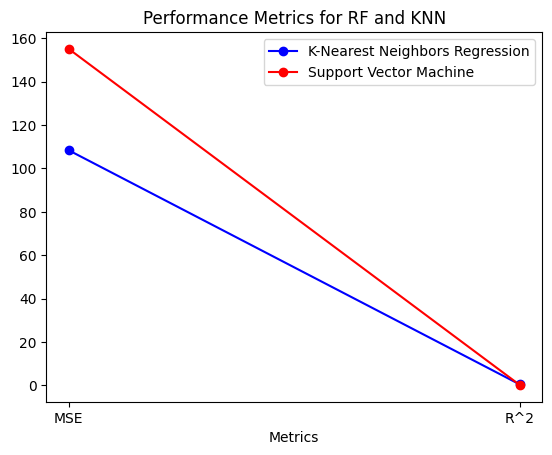

In [58]:
N = 2
ind = np.arange(N)
width = 0.35

kn_metrics = [knn_mse, knn_r2]
svr_metrics = [svr_mse, svr_r2]

fig, ax = plt.subplots()

ax.plot(ind, kn_metrics, label='K-Nearest Neighbors Regression', marker='o', linestyle='-', color='b')
ax.plot(ind, svr_metrics, label='Support Vector Machine', marker='o', linestyle='-', color='r')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind)
ax.set_xticklabels(['MSE', 'R^2'])
ax.legend()

plt.show()